In [ ]:
## Data description

The rankLP module contains pre-processed data located in the wzs.examples submodule.  These can be imported as demonstrated below.

Populating the interactive namespace from numpy and matplotlib


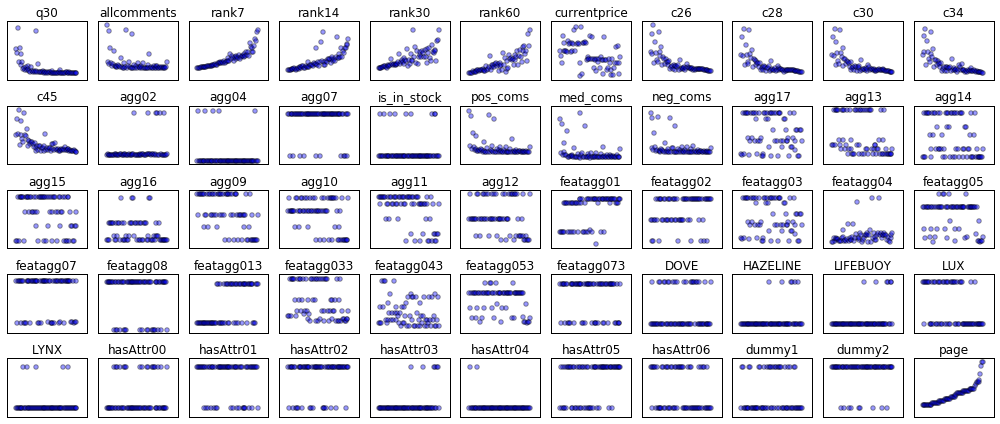

In [60]:
from examples.df929 import df
import rankLP as rlp

%pylab inline

df = rlp.flipRankCols(df)
df = df.rename(columns={"positive_comment_num":"pos_coms","negative_comment_num":"neg_coms","medium_comment_num":"med_coms"})

figsize(14,6)
colnames=df.columns[:55]
for i in range(5):
    for j in range(11):
        subplot(5,11,11*i+j+1)
        scatter(range(len(df)),df[colnames[11*i+j]], alpha=.4)
        xticks([]); yticks([]); title(colnames[11*i+j])
        tight_layout()
#        savefig("/home/evan/Desktop/xi_vs_rank.png")

the above charts are the columns which we may include in the solution, ordered by the the item_rank column (rank 7,22, etc. at left and rank 2990 at right). The problem we are trying to solve is how to linearly combine all of these columns so that their rank is monotonically decreasing.

column definitions can be found by importing them from the same submodule that the input dataframe was found

In [61]:
from examples.df929 import chnAttLookup
for k,v in chnAttLookup.items():  print k,v

hasAttr00 性别男
hasAttr01 性别通用
hasAttr02 成人
hasAttr03 儿童
hasAttr04 奶香型
hasAttr05 清香型
hasAttr06 花香型


In [62]:
from data.featxx import feat_
for k, v in sorted(feat_.items()): print k, v.keys()[0], '\t', feat_[k][v.keys()[0]][0], feat_[k][v.keys()[0]][1]

01 "净含量" 	"200-499ml（g）" "200-499ml（g）"
02 "香型" 	"清香型" "清香型"
03 "商品名称" 	"舒耐抑汗走珠" "多芬轻柔活肤滋养美肤沐浴乳200ml"
04 "商品毛重" 	"80.00g" "230.00g"
05 "功效" 	"爽肤，其它" "滋养"
06 "商品产地" 	"菲律宾" "合肥"
07 "适用人群" 	"成人" "成人"
08 "性别" 	"通用" "通用"


In [9]:
results = {
    "a__featagg02int": 270,
    "a__hasAttr00bin": 267,
    "a__hasAttr06bin": 264,
    "a__agg02int": 253,
    "a__featagg08bin": 251,
    "a__q30int": 237,
    "a__rank7int": 237,
    "a__LIFEBUOYbin": 223,
    "a__currentpriceint": 214}

(0, 70.0)

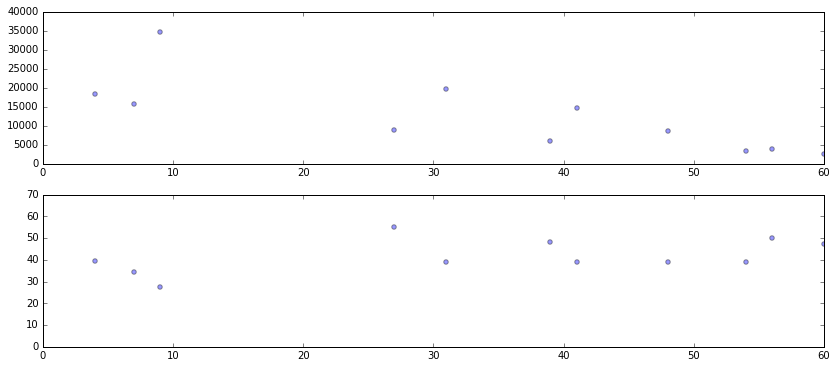

In [58]:
subplot(211);scatter(map(int,df.index),df["q30"], alpha=.4); xlim(0,60); ylim(0)
subplot(212);scatter(map(int,df.index),df["currentprice"], alpha=.4); xlim(0,60); ylim(0)

In [51]:
#[col for col in df.columns if col.endswith("coms")]

['pos_coms', 'med_coms', 'neg_coms']

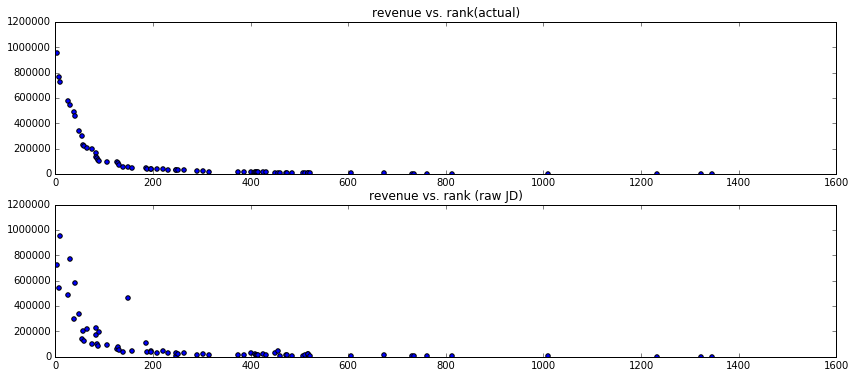

In [80]:
subplot(211);scatter(map(int,df.index),sorted(df.currentprice*df.q30, reverse=True)); xlim(0); ylim(0); title("revenue vs. rank(actual)")
subplot(212);scatter(map(int,df.index),df.currentprice*df.q30); xlim(0); ylim(0); title("revenue vs. rank (raw JD)")